In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv("C:/Users/Python/Desktop/machine learning/Vjezba 1/pima_indians_diabetes.csv")

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

Histagram

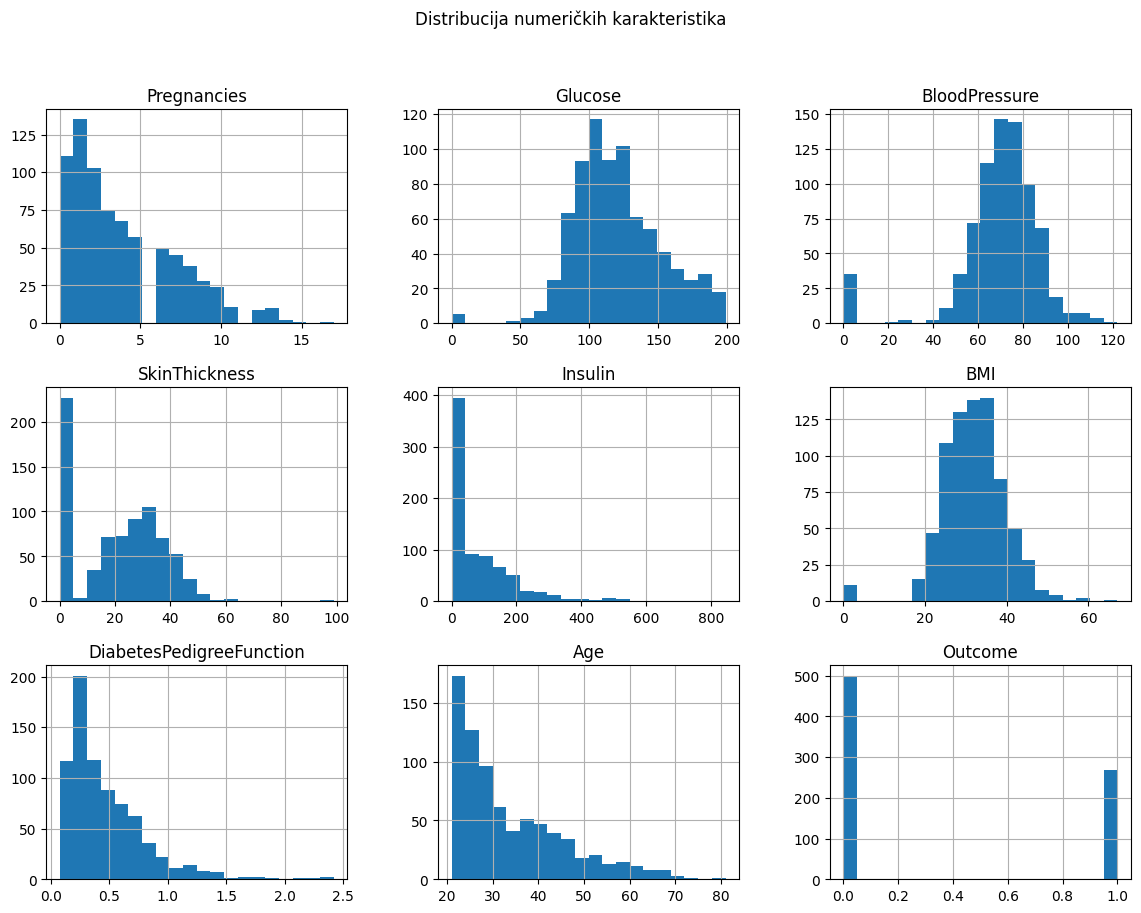

In [34]:
df.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribucija numeričkih karakteristika")
plt.show()

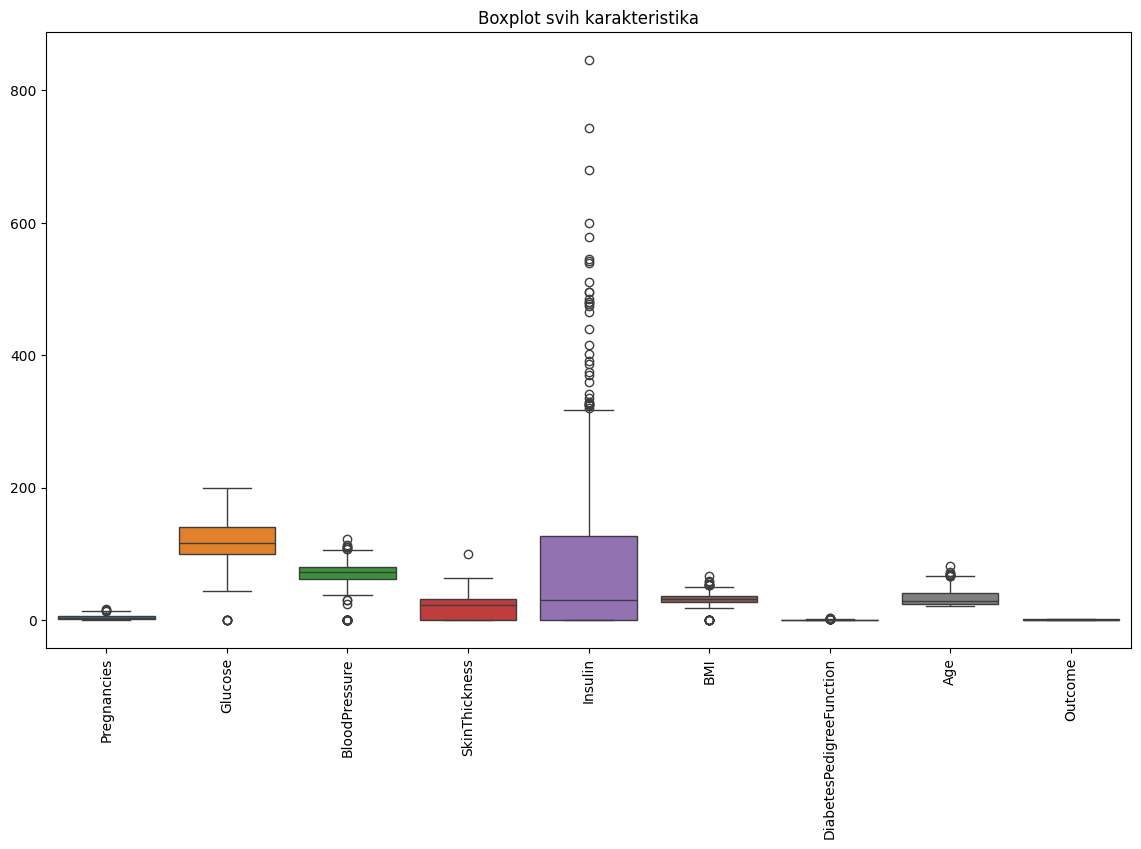

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title("Boxplot svih karakteristika")
plt.xticks(rotation=90)
plt.show()

Zamjena nula sa medijanima za relevantne kolone

In [35]:
cols_with_zero = ['Glucose', 'BloodPressure', "SkinThickness", 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


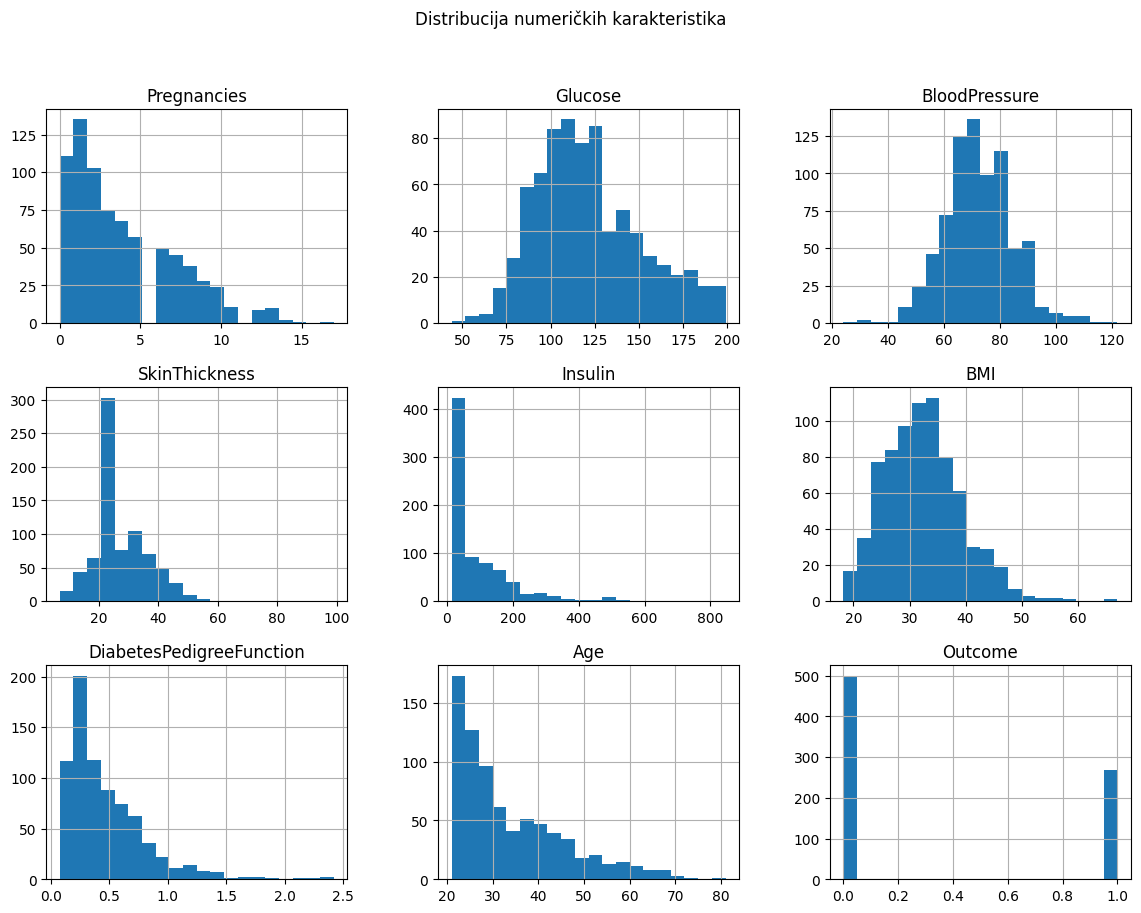

In [38]:
df.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribucija numeričkih karakteristika")
plt.show()

Standardizacija podataka

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Outcome", axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"]

In [40]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


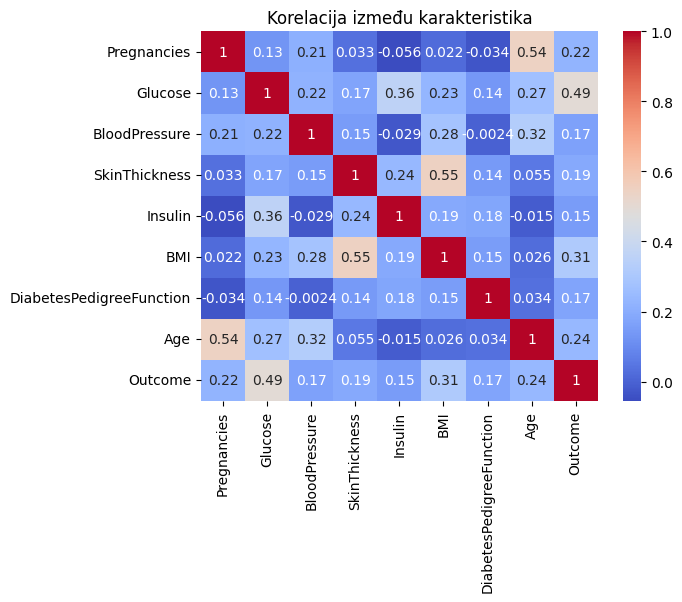

In [41]:
# Korelacijska matrica
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Korelacija između karakteristika")
plt.show()

In [42]:
# Selektovanje karakteristika na osnovu korelacije
cor_target = abs(df_scaled.corr()["Outcome"])
relevant_featers = cor_target[cor_target > 0.2]
print(relevant_featers)

Pregnancies    0.221898
Glucose        0.492782
BMI            0.312249
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64


In [45]:
pip install shap


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.1 MB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.8 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.2 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.2 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.2 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.2 MB/s eta 0:00:02
   ------------------------- -------------- 1.8/2.8 MB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 1.3 MB/s eta 0:01:53
   ---------------------------------------- 1.0/150.0 MB 1.3 MB/s eta 0:01:56
   ---------------------------------------- 1.3/150.0 MB 1.3 MB/s eta 0:01:59
   ---------------------------------------- 1.6/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:57
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:57
    --------------------------------------- 2.4/150.0 MB 1.2 MB/s eta 0:02:00
    --------------------------------------- 2.4/150.0 MB 1.2 MB/s eta 0:02:00
    --------------------------------------- 2.6/150.0 MB 1.2 MB/s eta 0:02:01
    --------------------------------------- 3.1/150.0 MB 1.2 MB/s eta 0:01:59
    ---


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
